# SOM classifier

Adapted from [Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) by scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# --- for running the script without pip
import sys
sys.path.append("../")
# ---

import susi

## Get data

In [7]:
n_features = 2

X, y = make_classification(n_features=n_features, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

## Classify and plot

0.75


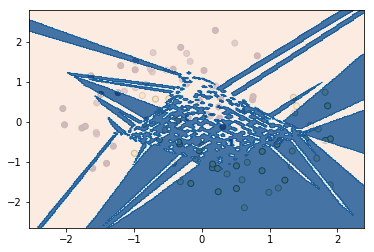

0.625


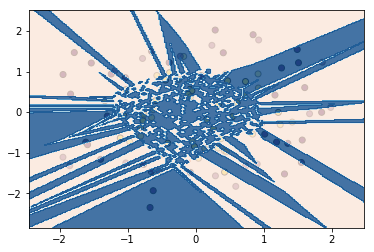

0.7


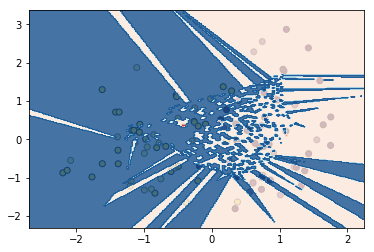

In [3]:
# NBVAL_IGNORE_OUTPUT

h = .02  # step size in the mesh
cm = plt.cm.RdBu

som_list = []

for i, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # mesh grid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    som = susi.SOMClassifier(
        n_rows=40,
        n_columns=40,
        n_iter_unsupervised=100,
        n_iter_supervised=100,
        learning_rate_start=0.5,
        learning_rate_end=0.05,
        # do_class_weighting=True,
        random_state=None)
    som.fit(X_train, y_train)
    y_pred = som.predict(X_test)
    print(som.score(X_test, y_test))
    
    # plot data
    fig, ax = plt.subplots()
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k')
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test,edgecolors='k', alpha=0.6)
    
    # plot classification
    Z = som.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    som_list.append(som)
    
    plt.show()


## Plot u-Matrix

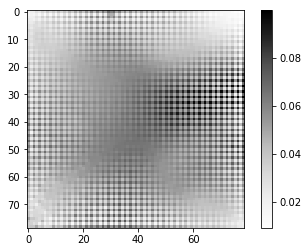

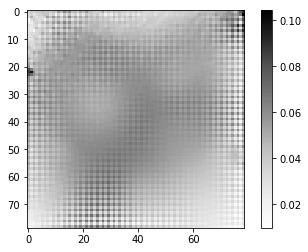

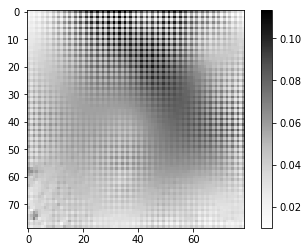

In [4]:
for som in som_list:
    u_matrix = som.get_u_matrix()
    plt.imshow(np.squeeze(u_matrix), cmap="Greys")
    plt.colorbar()
    plt.show()